In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from sklearn.externals import joblib
from scipy.signal import convolve2d

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from itertools import chain

In [ ]:
model = np.load('/mnt/bulk2/exp_res/models/9/conv_2d_bpm_self_artist_tag_50_intersc_b2_run9_param.npz')

In [26]:
self_model = np.load('/mnt/bulk2/exp_res/models/S0/conv_2d_self_50_intersc_runS0_param.npz')

In [29]:
bpm_model = np.load('/mnt/bulk2/exp_res/models/S2/conv_2d_bpm_50_intersc_runS2_param.npz')

In [31]:
artist_model = np.load('/mnt/bulk2/exp_res/models/S7/conv_2d_artist_tag_50_intersc_runS7_param.npz')

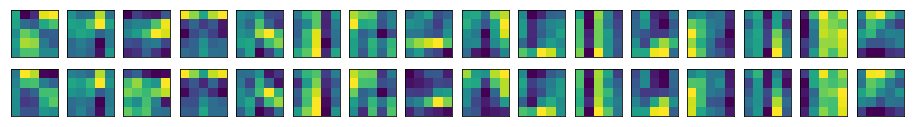

In [36]:
fig, axes = plt.subplots(2, 16, figsize=(16,2))

N = np.zeros((16, 2, 2))
for i in range(model['arr_2'].shape[1]):
    for j in range(model['arr_2'].shape[0]):
        l1 = np.linalg.norm(model['arr_2'][j,i], ord=1)
        l2 = np.linalg.norm(model['arr_2'][j,i], ord=2)
        N[j,i,0] = l1
        N[j,i,1] = l2
        axes[i,j].imshow(model['arr_2'][j,i])
        axes[i,j].set_xticks([]) 
        axes[i,j].set_yticks([])

avg. L1 norm 1.97011089325
avg. L2 norm 1.34885120392


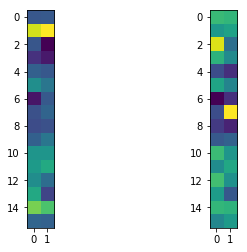

In [43]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(N[:,:,0])
axes[1].imshow(N[:,:,1])

print 'avg. L1 norm', N[:,:,0].mean()
print 'avg. L2 norm', N[:,:,1].mean()

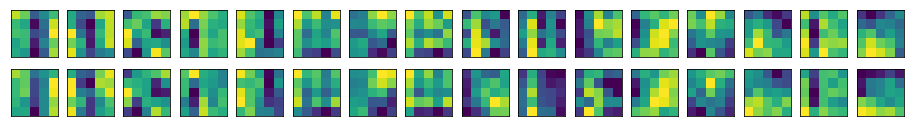

In [44]:
fig, axes = plt.subplots(2, 16, figsize=(16,2))

N = np.zeros((16, 2, 2))
for i in range(self_model['arr_2'].shape[1]):
    for j in range(self_model['arr_2'].shape[0]):
        l1 = np.linalg.norm(self_model['arr_2'][j,i], ord=1)
        l2 = np.linalg.norm(self_model['arr_2'][j,i], ord=2)
        N[j,i,0] = l1
        N[j,i,1] = l2
        axes[i,j].imshow(self_model['arr_2'][j,i])
        axes[i,j].set_xticks([]) 
        axes[i,j].set_yticks([]) 

avg. L1 norm 1.22097146511
avg. L2 norm 0.801167886704


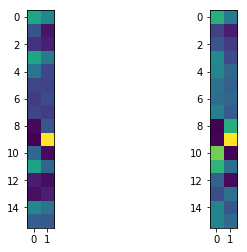

In [45]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(N[:,:,0])
axes[1].imshow(N[:,:,1])

print 'avg. L1 norm', N[:,:,0].mean()
print 'avg. L2 norm', N[:,:,1].mean()

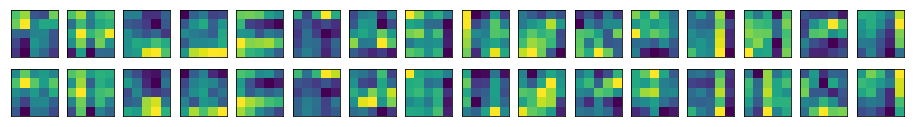

In [48]:
fig, axes = plt.subplots(2, 16, figsize=(16,2))

N = np.zeros((16, 2, 2))
for i in range(bpm_model['arr_2'].shape[1]):
    for j in range(bpm_model['arr_2'].shape[0]):
        l1 = np.linalg.norm(bpm_model['arr_2'][j,i], ord=1)
        l2 = np.linalg.norm(bpm_model['arr_2'][j,i], ord=2)
        N[j,i,0] = l1
        N[j,i,1] = l2
        axes[i,j].imshow(bpm_model['arr_2'][j,i])
        axes[i,j].set_xticks([]) 
        axes[i,j].set_yticks([]) 

avg. L1 norm 1.09347284772
avg. L2 norm 0.744311151095


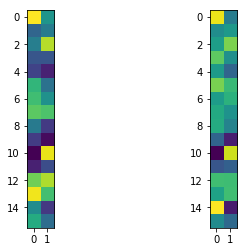

In [49]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(N[:,:,0])
axes[1].imshow(N[:,:,1])

print 'avg. L1 norm', N[:,:,0].mean()
print 'avg. L2 norm', N[:,:,1].mean()

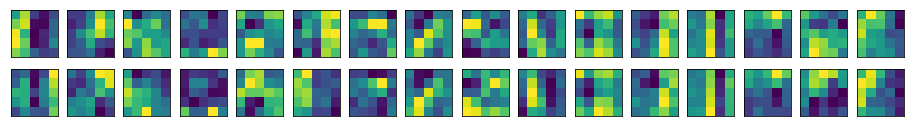

In [50]:
fig, axes = plt.subplots(2, 16, figsize=(16,2))

N = np.zeros((16, 2, 2))
for i in range(artist_model['arr_2'].shape[1]):
    for j in range(artist_model['arr_2'].shape[0]):
        l1 = np.linalg.norm(artist_model['arr_2'][j,i], ord=1)
        l2 = np.linalg.norm(artist_model['arr_2'][j,i], ord=2)
        N[j,i,0] = l1
        N[j,i,1] = l2
        axes[i,j].imshow(artist_model['arr_2'][j,i])
        axes[i,j].set_xticks([]) 
        axes[i,j].set_yticks([]) 

avg. L1 norm 1.22931646556
avg. L2 norm 0.826696123928


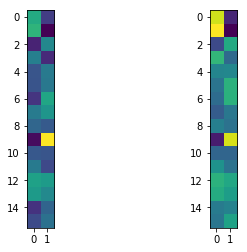

In [51]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(N[:,:,0])
axes[1].imshow(N[:,:,1])

print 'avg. L1 norm', N[:,:,0].mean()
print 'avg. L2 norm', N[:,:,1].mean()

In [83]:
X = np.load('/mnt/msdmel/TRAAABD128F429CF47.npy')
x = X[0, :, 1000:1216, :]
z = (x + model['arr_0'][None, None, :]) * model['arr_1'][None, None, :]

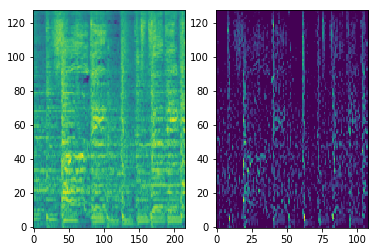

In [457]:
i_ch = 0
o_ch = 9
A = convolve2d(z[i_ch], model['arr_2'][o_ch,i_ch], mode='same')[::2,:]
A += model['arr_3'][o_ch]

fig, axes = plt.subplots(1,2)
axes[0].imshow(z[i_ch].T, aspect='auto', origin='low')
axes[1].imshow(A.T , aspect='auto', origin='low')

In [169]:
reduc = TSNE(n_components=2)
# reduc = PCA(n_components=3, whiten=False)

# prepare data points
i_ch = 0

B = np.concatenate(
    map(lambda a: a.reshape(-1,25),
        [model['arr_2'][:, i_ch],
         self_model['arr_2'][:, i_ch],
         bpm_model['arr_2'][:, i_ch],
         artist_model['arr_2'][:, i_ch]]),
    axis=0)
b = reduc.fit_transform(B)

c = [[i] * 16 for i in range(4)]
c = np.array(list(chain.from_iterable(c)))

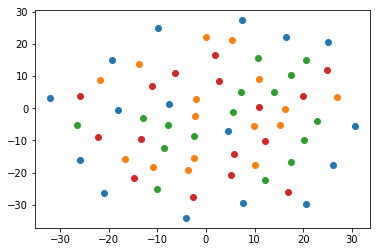

In [170]:
for cl in set(c):
    idx = np.where(c==cl)[0]
    plt.scatter(b[idx,0], b[idx,1])

In [171]:
model = np.load('/mnt/bulk2/exp_res/models/7/conv_2d_tag_lyrics_cdr_tag_self_year_50_intersc_bfc_run7_param.npz')

In [173]:
[(k, v.shape) for k, v in model.iteritems()]

[('arr_24', (64,)),
 ('arr_25', (64,)),
 ('arr_26', (128, 64, 3, 3)),
 ('arr_27', (128,)),
 ('arr_20', (64, 64, 3, 3)),
 ('arr_21', (64,)),
 ('arr_22', (64,)),
 ('arr_23', (64,)),
 ('arr_67', (256, 50)),
 ('arr_28', (128,)),
 ('arr_29', (128,)),
 ('arr_46', (256,)),
 ('arr_47', (256,)),
 ('arr_44', (256,)),
 ('arr_45', (256,)),
 ('arr_42', (256,)),
 ('arr_43', (256,)),
 ('arr_40', (256,)),
 ('arr_41', (256,)),
 ('arr_68', (50,)),
 ('arr_55', (256, 50)),
 ('arr_48', (256, 256)),
 ('arr_49', (256,)),
 ('arr_54', (50,)),
 ('arr_59', (512, 128)),
 ('arr_58', (50,)),
 ('arr_61', (128,)),
 ('arr_33', (256,)),
 ('arr_32', (256, 128, 3, 3)),
 ('arr_31', (128,)),
 ('arr_30', (128,)),
 ('arr_37', (256,)),
 ('arr_36', (256,)),
 ('arr_35', (256,)),
 ('arr_34', (256,)),
 ('arr_66', (2,)),
 ('arr_39', (256,)),
 ('arr_38', (256, 256, 1, 1)),
 ('arr_19', (64,)),
 ('arr_18', (64,)),
 ('arr_57', (256, 50)),
 ('arr_56', (50,)),
 ('arr_51', (256,)),
 ('arr_50', (256,)),
 ('arr_53', (256, 50)),
 ('arr_52',

In [187]:
import sys
sys.path.append('/home/ubuntu/workbench/MTLMusicRepresentation/')
from model.model import Model
from model.preproc.model import MelSpectrogramGPU
from utils.misc import get_layer, load_config
import namedtupled
import os
from utils.misc import get_layer
import theano
from lasagne import layers as L

In [585]:
# load configuration for model
# model_fn = '/mnt/bulk2/exp_res/models/73/conv_2d_self_year_bpm_tag_lyrics_50_intersc_b4_run73_state.dat.gz'
model_fn = '/mnt/bulk2/exp_res/models/S0/conv_2d_self_50_intersc_runS0_state.dat.gz'
model_id = os.path.splitext(os.path.basename(model_fn))[0]
model_state = joblib.load(model_fn)
config = namedtupled.map(model_state['config'])

# load model
mtl = Model(config)

(None, 2, 216, 128)
(None, 2, 216, 128)
('conv1.pl', (None, 16, 54, 64))
('conv2.pl', (None, 32, 27, 32))
('conv3.pl', (None, 64, 13, 16))
('self.conv4.pl', (None, 64, 6, 8))
('self.conv5.pl', (None, 128, 3, 4))
('self.conv6.2.bn.nonlin', (None, 256, 3, 4))
(None, 2)
Loadong pre-trained weight...


In [572]:
feat_layer_key = 'conv3.1.bn.nonlin'
feature_layer = get_layer(mtl.net, feat_layer_key)
input_var = mtl.net_var['tag.inputs']

# feature is not output dependant
feature = L.get_output(feature_layer, deterministic=True)
feature_ext = theano.function(
    inputs=input_var, outputs=feature, allow_input_downcast=True
)

In [490]:
split = joblib.load('/mnt/msd/meta_data/msd_tag_50_plsa_intrsc.split')

In [573]:
from tqdm import tqdm
mean_acts = []
target_tracks = np.random.choice(split['train'], 2000, replace=False)
for tr in tqdm(target_tracks):
    fn = '/mnt/msdmel/{}.npy'.format(tr)
    x = np.load(fn)
    X_ = []
    for j in range(0, x.shape[-2], 216):
        x_ = x[0, :, j:j+216]
        if x_.shape[-2] < 216:
            continue
        else:
            X_.append(x_)
    acts = feature_ext(np.array(X_))
    # mean_act = np.array(acts).mean(axis=(0,2,3))
    mean_acts.append(acts.mean(axis=(0,2,3)))
mean_acts = np.array(mean_acts)

100%|██████████| 2000/2000 [07:06<00:00,  6.85it/s]


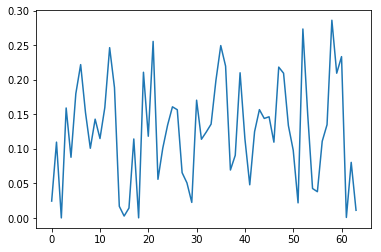

In [574]:
plt.plot(mean_acts[10])

In [580]:
# collect top-topics per task and per samples
# e = joblib.load('/mnt/msd/meta_data/msd_tag_50_plsa_intrsc.dat.gz')
e = joblib.load('/mnt/msd/meta_data/bpm_50_gmm_intrsc.dat.gz')
# e = joblib.load('/mnt/msd/meta_data/year_50_gmm_intrsc.dat.gz')

In [581]:
top_topics_tag = [np.argmax(e['item_factors'][e['tids'].index(tr)]) for tr in target_tracks]

In [584]:
thresh = 3
from collections import Counter
topk_idx = np.argsort(mean_acts, axis=0)[-5:,:]
for u in range(64): # per units
    tt = [top_topics_tag[t] for t in topk_idx[:, u]]
    ctt = Counter(tt)
    most_common = ctt.most_common(1)[0]
    if most_common[1] >= thresh:
        print 'unit:', u, '/ topic:', most_common[0], '/ n_tracks:', most_common[1]

unit: 5 / topic: 9 / n_tracks: 2
unit: 19 / topic: 12 / n_tracks: 2
unit: 20 / topic: 33 / n_tracks: 2
unit: 25 / topic: 5 / n_tracks: 2
unit: 33 / topic: 32 / n_tracks: 2
unit: 34 / topic: 6 / n_tracks: 2
unit: 38 / topic: 39 / n_tracks: 2
unit: 41 / topic: 39 / n_tracks: 2
unit: 47 / topic: 3 / n_tracks: 2
unit: 55 / topic: 24 / n_tracks: 2
unit: 62 / topic: 14 / n_tracks: 2


In [583]:
# As for now, pick tracks most related to the topics
topic_dist = np.array([e['item_factors'][e['tids'].index(tr)] for tr in target_tracks])
top_tracks_per_topic = topic_dist.argsort(axis=0)[-5:,:][::-1,:]

In [536]:
target_topic = 10
track_fns = ['/mnt/msdmel/{}.npy'.format(split['valid'][tid])
             for tid in top_tracks_per_topic[:, target_topic]]

In [559]:
target_unit = 28
t_st = 900

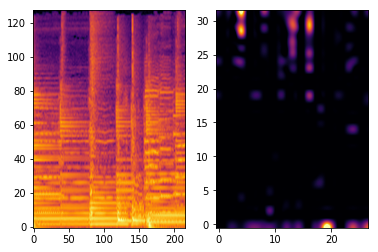

In [561]:
y = np.load(track_fns[2])
slc = slice(t_st, t_st+216)
y_ = y[:, :, slc, :]
fig, axes = plt.subplots(1, 2)
axes[0].imshow(y_[0, 0].T, origin='low', aspect='auto', interpolation='lanczos', cmap='inferno')
axes[1].imshow(feature_ext(y_)[0, target_unit].T, origin='low', aspect='auto', interpolation='lanczos', cmap='inferno')